<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-5-Angle-measure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### https://www.javaer101.com/ko/article/1056857.html

In [3]:
!gdown https://drive.google.com/uc?id=1CKis-HH6bAihK8KTx8xiYBonuXIXp8dp

Downloading...
From: https://drive.google.com/uc?id=1CKis-HH6bAihK8KTx8xiYBonuXIXp8dp
To: /content/rotate_me.png
100% 236k/236k [00:00<00:00, 77.3MB/s]


In [7]:
import numpy as np
import cv2
import math
from scipy import ndimage
from google.colab.patches import cv2_imshow

from time import sleep

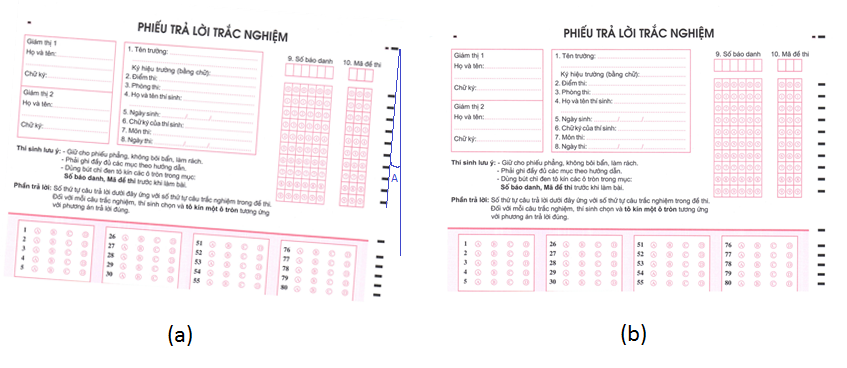

Angle is 0.0


In [8]:
img_before = cv2.imread('rotate_me.png')

cv2_imshow(img_before)
# key = cv2.waitKey(0)
sleep(5)

img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

print("Angle is {}".format(median_angle))
cv2.imwrite('rotated.jpg', img_rotated)
cv2.destroyAllWindows()

In [13]:
import numpy as np
import cv2
import math
from scipy import ndimage

def get_rotation_angle(image_path):
    img_before = cv2.imread(image_path)

    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection with adjusted thresholds
    img_edges = cv2.Canny(img_gray, 50, 150, apertureSize=3)

    # Detect lines using Hough transform with improved parameters
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 80, minLineLength=100, maxLineGap=10)

    if lines is None:
        print("No lines detected!")
        return 0  # Return 0 if no lines are detected

    angles = []

    # Collect angles from detected lines
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draw the line for visual confirmation
            angle = math.degrees(math.atan2(y2 - y1, x2 - x1))

            # Filter out angles that are close to 0 or 90 degrees (these are likely noise)
            if abs(angle) > 1 and abs(angle) < 89:
                angles.append(angle)

    if len(angles) == 0:
        print("No valid angles found!")
        return 0  # Return 0 if no valid angles are found

    # Calculate the median of the collected angles
    median_angle = np.median(angles)

    # Rotate the image by the median angle to correct the alignment
    img_rotated = ndimage.rotate(img_before, median_angle)

    # Optional: save or display the rotated image
    # cv2.imwrite('rotated_image.png', img_rotated)
    # cv2.imshow('Rotated Image', img_rotated)
    # cv2.waitKey(0)

    return median_angle

# Example of usage
rotation_angle = get_rotation_angle('rotate_me.png')
print("Detected rotation angle: {:.2f} degrees".format(rotation_angle))


Detected rotation angle: 3.91 degrees
